In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)

In [4]:
df.index

# index must be datetime index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [5]:
# df.index = pd.to_datetime(df.index)

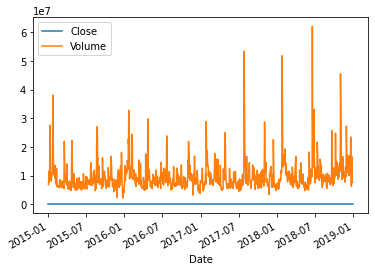

In [7]:
df.plot();

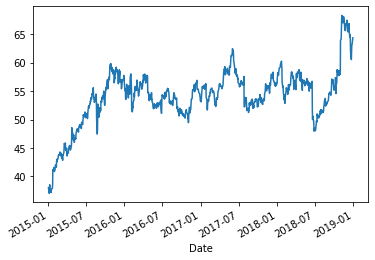

In [8]:
df['Close'].plot();

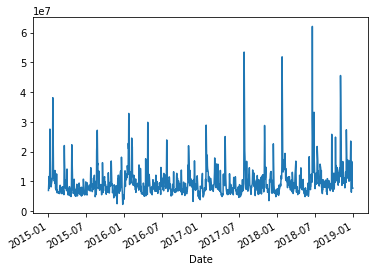

In [9]:
df['Volume'].plot();

# Plot Formatting

## Adding a title and axis labels

<div class="alert alert-info"><strong>NOTE:</strong> While we <em>can</em> pass a title into the pandas <tt>.plot()</tt> function, we can't pass x- and y-axis labels.<br>However, since <tt>.plot()</tt> returns a <tt>matplotlib.axes.AxesSubplot</tt> object, we can set the labels<br>on that object so long as we do it in the same jupyter cell. Setting an <tt>autoscale</tt> is done the same way.</div>

In [16]:
title = 'Starbucks Closing Stock Prices'
ylabel = 'Closing Price (USD)'
xlabel = 'Closing Date'

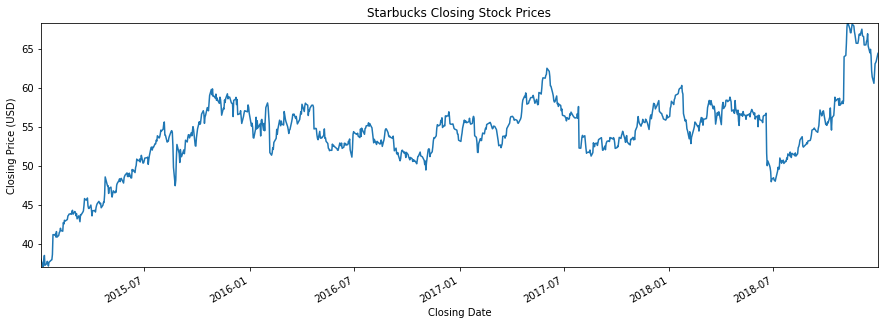

In [17]:
ax = df['Close'].plot(figsize=(15,5), title=title)
ax.autoscale(axis='both', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## X Limits
There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>.

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

### Choosing X Limits by Slice:

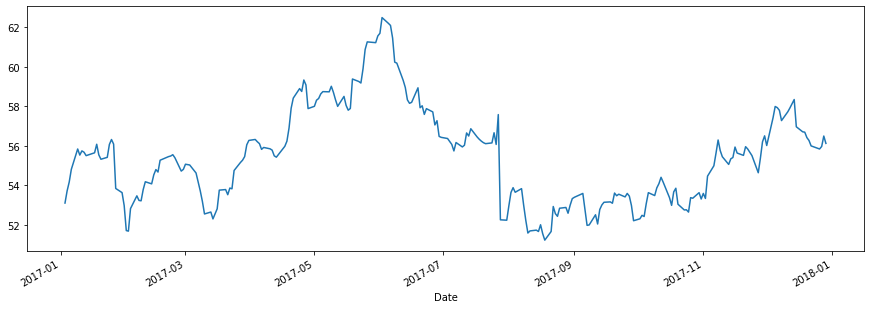

In [20]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(15,5));

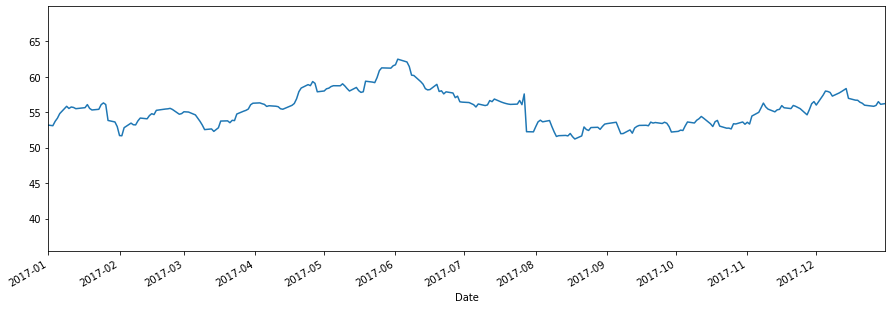

In [23]:
df['Close'].plot(figsize=(15,5), xlim = ['2017-01-01','2017-12-31']);

# Dates are separated by a comma:

## Y Limits

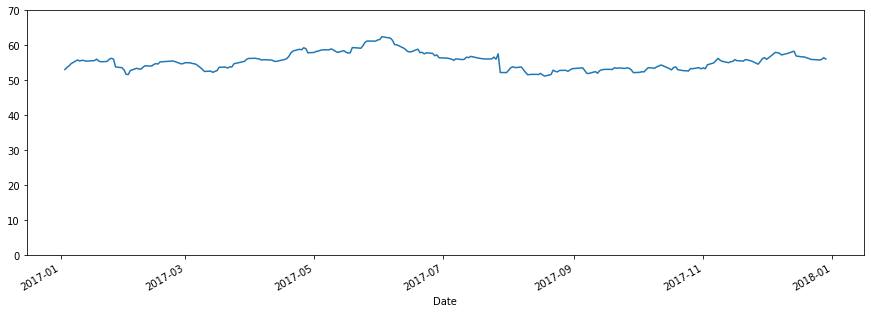

In [26]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(15,5), ylim=[0,70]);

## Color and Style
We can pass arguments into <tt>.plot()</tt> to change the linestyle and color. Refer to the Customizing Plots lecture from the previous section for more options.

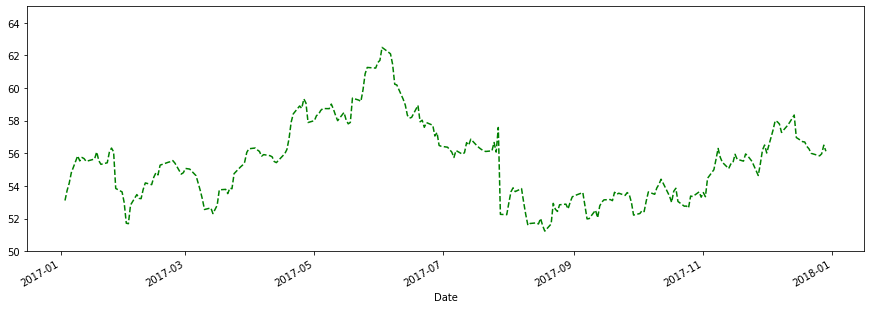

In [30]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(15,5), ylim=[50,65], ls='--', c='green');

## X Ticks
To do this, we'll borrow a tool from <tt>matplotlib</tt> called <tt>dates</tt>.
For a full list of locator options available from <tt>matplotlib.dates</tt> visit <a href='https://matplotlib.org/api/dates_api.html#date-tickers'>https://matplotlib.org/stable/api/dates_api.html</a>

In [31]:
from matplotlib import dates

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

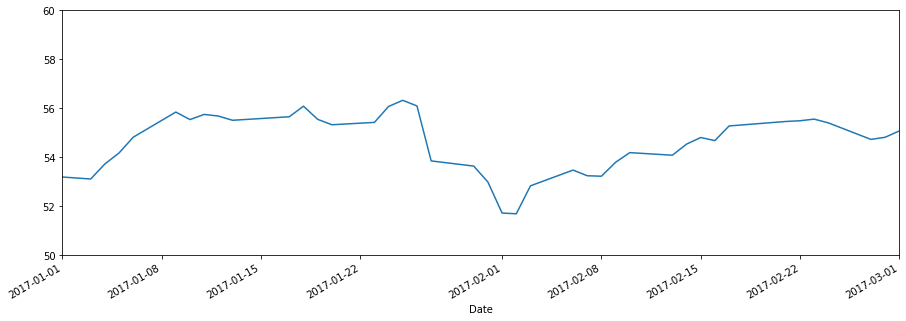

In [36]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(15,5));

## Major vs. Minor Axis Values
All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the <em>minor axis</em>, perhaps to separate month names from days of the month.

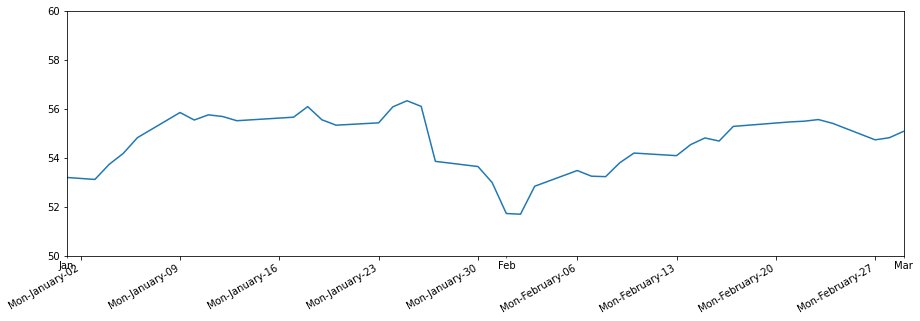

In [47]:
# CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(15,5))

# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0)) # 0: Monday
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

## Adding Gridlines
We can add x and y axis gridlines that extend into the plot from each major tick mark.

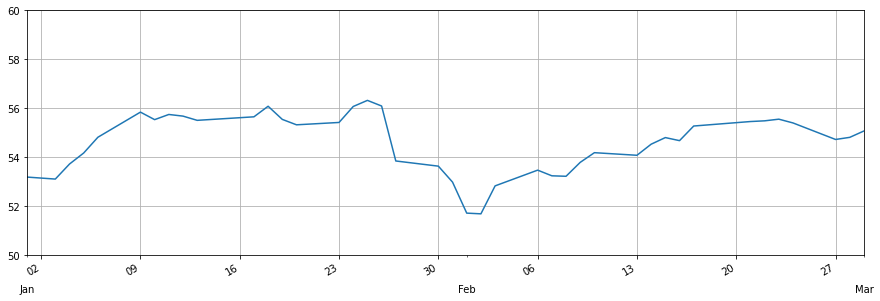

In [50]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(15,5))

ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0)) # 0: Monday
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)